In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import cdd
from modulus_tools import demo_graphs
from modulus_tools import algorithms as alg
from itertools import product
import minimum_degree as mg

In [8]:
# the demo graph
#G = nx.Graph()
#nx.add_path(G, (0,1,2,3,4,5,0))
#pos = nx.circular_layout(G)
import random as rnd
seed= 123
#G = nx.gnp_random_graph(8,0.4,seed)
#pos = nx.spring_layout(G)
#nx.draw(G)
# the demo graph
#G, pos = demo_graphs.slashed_house_graph()
import random as rnd
seed= 123


In [9]:
# enumerate the edges
def dual(G):
    for i, (u,v) in enumerate(G.edges()):
        G[u][v]['enum'] = i
    # get a list of spanning trees
    trees = list(alg.spanning_trees(G))
    # count the number of edges
    m = len(G.nodes)
    # initialize an empty list of rows for the augmented matrix
    rows = []

    # add rows corresponding to the constraints rho >= 0
    for i in range(m):
        row = (m+1)*[0]
        row[i+1] = 1
        rows.append(row)
    
# add rows corresponding to the constraints N*rho >= 1
    for tree in trees:
        H = nx.Graph(tree)
        row = [-1] + m*[0]
        for u in H.nodes:
            row[u+1] = H.degree[u]
        rows.append(row)   
    # create the polyhedron in cdd
    mat = cdd.Matrix(rows, number_type='fraction')
    mat.rep_type = cdd.RepType.INEQUALITY
    poly = cdd.Polyhedron(mat)
    ext = poly.get_generators()
    # list of dual objects
    dual = []
    # loop over extreme points and directions
    for i in range(ext.row_size):
    
    # skip extreme directions
        if ext[i][0] == 0:
            continue
        
    # add the vector representation of the dual object
        dual.append(ext[i][1:])
    dual= np.array(dual)
    print(len(dual))
    return dual

In [10]:
def DU(G):
    import numpy as np
    import itertools
    DUAL = []
    for i in range(1,len(G.nodes())+1):
        for S in itertools.combinations(G.nodes(),i):
            S= set(S)
            a=1
            for j in range(1,len(S)):
                for A in itertools.combinations(S,j):
                    A= set(A)
                    if mg.minimum_degree(G,S) == mg.minimum_degree(G,A) + mg.minimum_degree(G,S.difference(A)):
                        a = 0
            if a == 1:
                row = np.zeros(len(G.nodes()))
                for u in G.nodes():
                        if u in S:
                            row[u]= 1/mg.minimum_degree(G,S)
                        else:
                            row[u]= 0
                DUAL.append(row) 
    DUAL= np.array(DUAL)
    print(len(DUAL))
    if len(dual(G)) == len(DUAL):
        print('Test passed')
    else:
        print('Test not passed')

In [11]:
def draw(G):
    # number of columns and rows for plot
    A = dual(G)
    ncol = 3
    nrow = int(np.ceil(len(A)/ncol))

    # draw the trees
    plt.figure(figsize=(3*ncol,3*nrow))

    # draw the blocker
    for i, obj in enumerate(A):
        plt.subplot(nrow,ncol,i+1)
        labels = {u:obj[u] for u in G.nodes}
        nodes = [u for u in G.nodes if obj[u] > 0]
        nx.draw(G, pos, node_size=100, node_color='black', edge_color='gray')
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color='white')
        nx.draw_networkx_labels(G, pos,labels=labels, font_size=12)
    min_row = min(A, key=sum)
    print('min = ', sum(min_row))
    print('etamax = 1/min = ', 1/sum(min_row))
    print("Row with minimum sum:", min_row)

    plt.tight_layout()
    return A,min_row,1/sum(min_row)

6
min =  2/3
etamax = 1/min =  3/2
Row with minimum sum: [0 Fraction(1, 3) 0 Fraction(1, 3)]


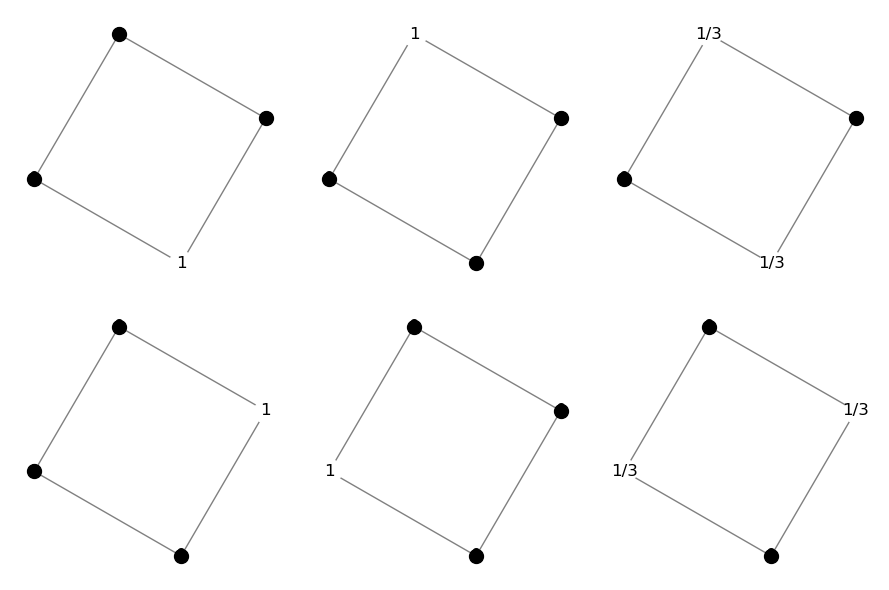

In [12]:
G = nx.Graph()
nx.add_path(G,[0,1,2,3,0])
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

8
min =  1/2
etamax = 1/min =  2
Row with minimum sum: [0 0 Fraction(1, 2) 0 0]


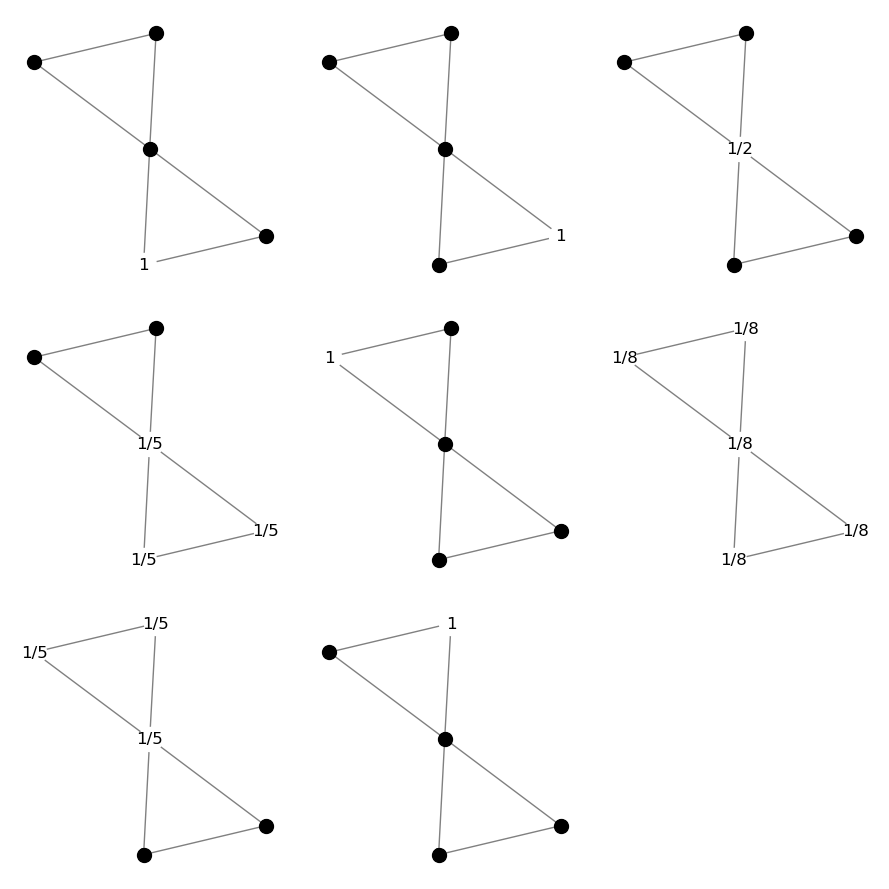

In [13]:
G = nx.Graph()
nx.add_path(G,[0,1,2,3,4,2,0])
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

6
min =  1/3
etamax = 1/min =  3
Row with minimum sum: [0 0 0 0 Fraction(1, 3) 0]


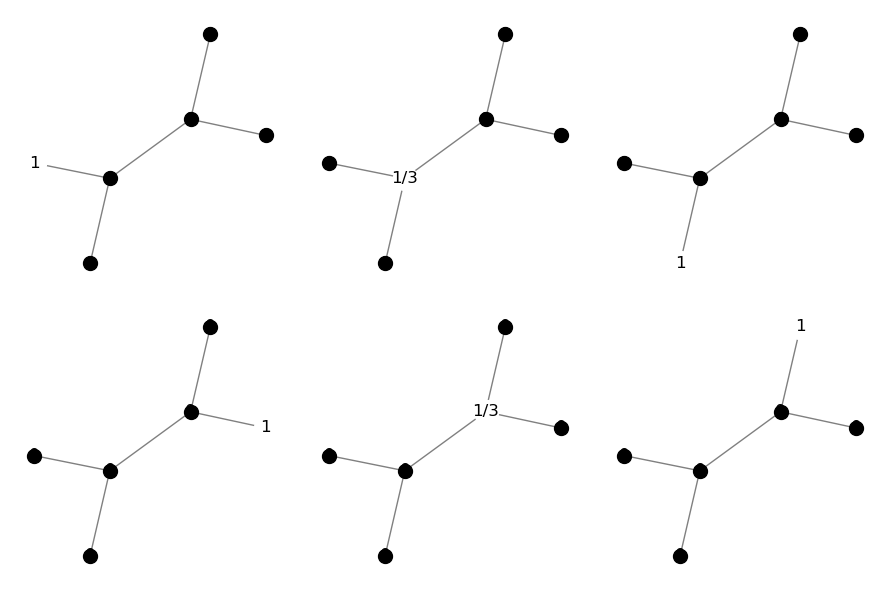

In [14]:
G = nx.Graph()
nx.add_path(G,[0,1,2])
nx.add_path(G,[3,4,5])
nx.add_path(G,[4,1])
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

6
min =  2/3
etamax = 1/min =  3/2
Row with minimum sum: [Fraction(1, 6) Fraction(1, 6) Fraction(1, 6) Fraction(1, 6)]


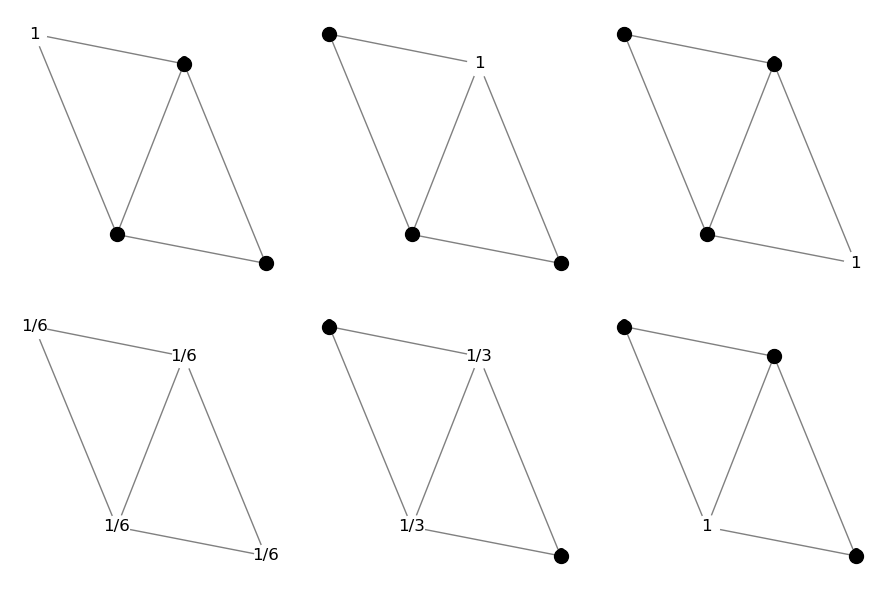

In [9]:
G = nx.Graph()
nx.add_path(G,[0,1,2,3,0,2])
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

7
min =  1/2
etamax = 1/min =  2
Row with minimum sum: [0 Fraction(1, 2) 0 0 0]


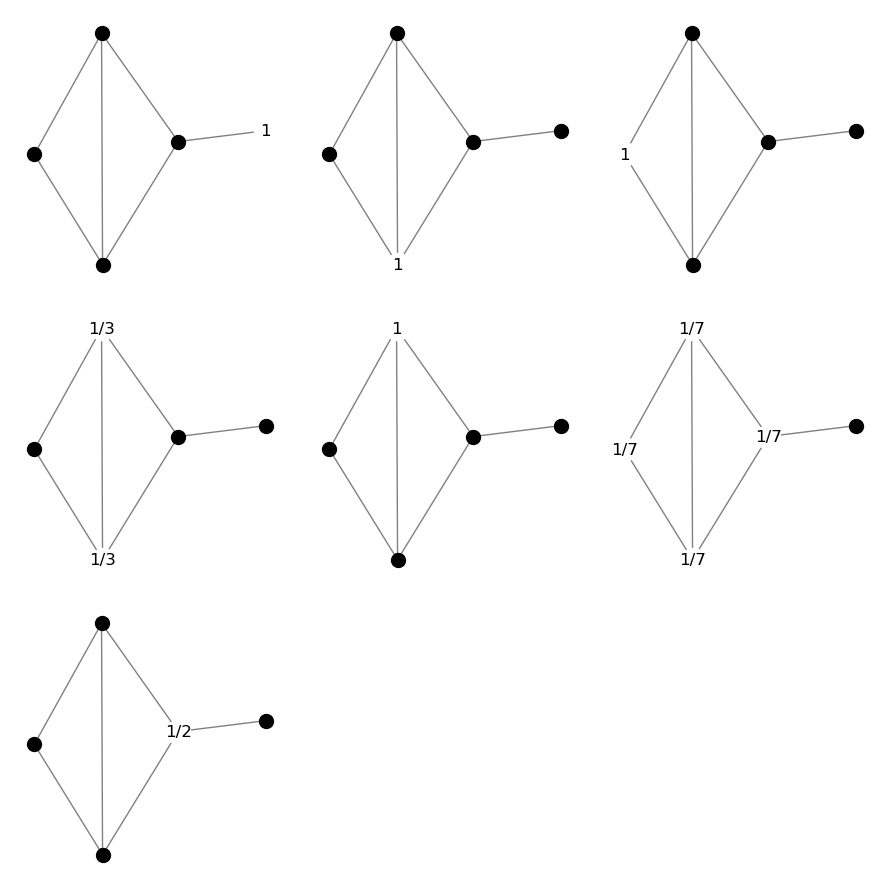

In [17]:
G = nx.Graph()
nx.add_path(G,[0,1,2,3,4,2])
nx.add_path(G,[1,4])
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

23
min =  4/7
etamax = 1/min =  7/4
Row with minimum sum: [Fraction(1, 14) Fraction(1, 14) Fraction(1, 14) Fraction(1, 14)
 Fraction(1, 14) Fraction(1, 14) Fraction(1, 14) Fraction(1, 14)]


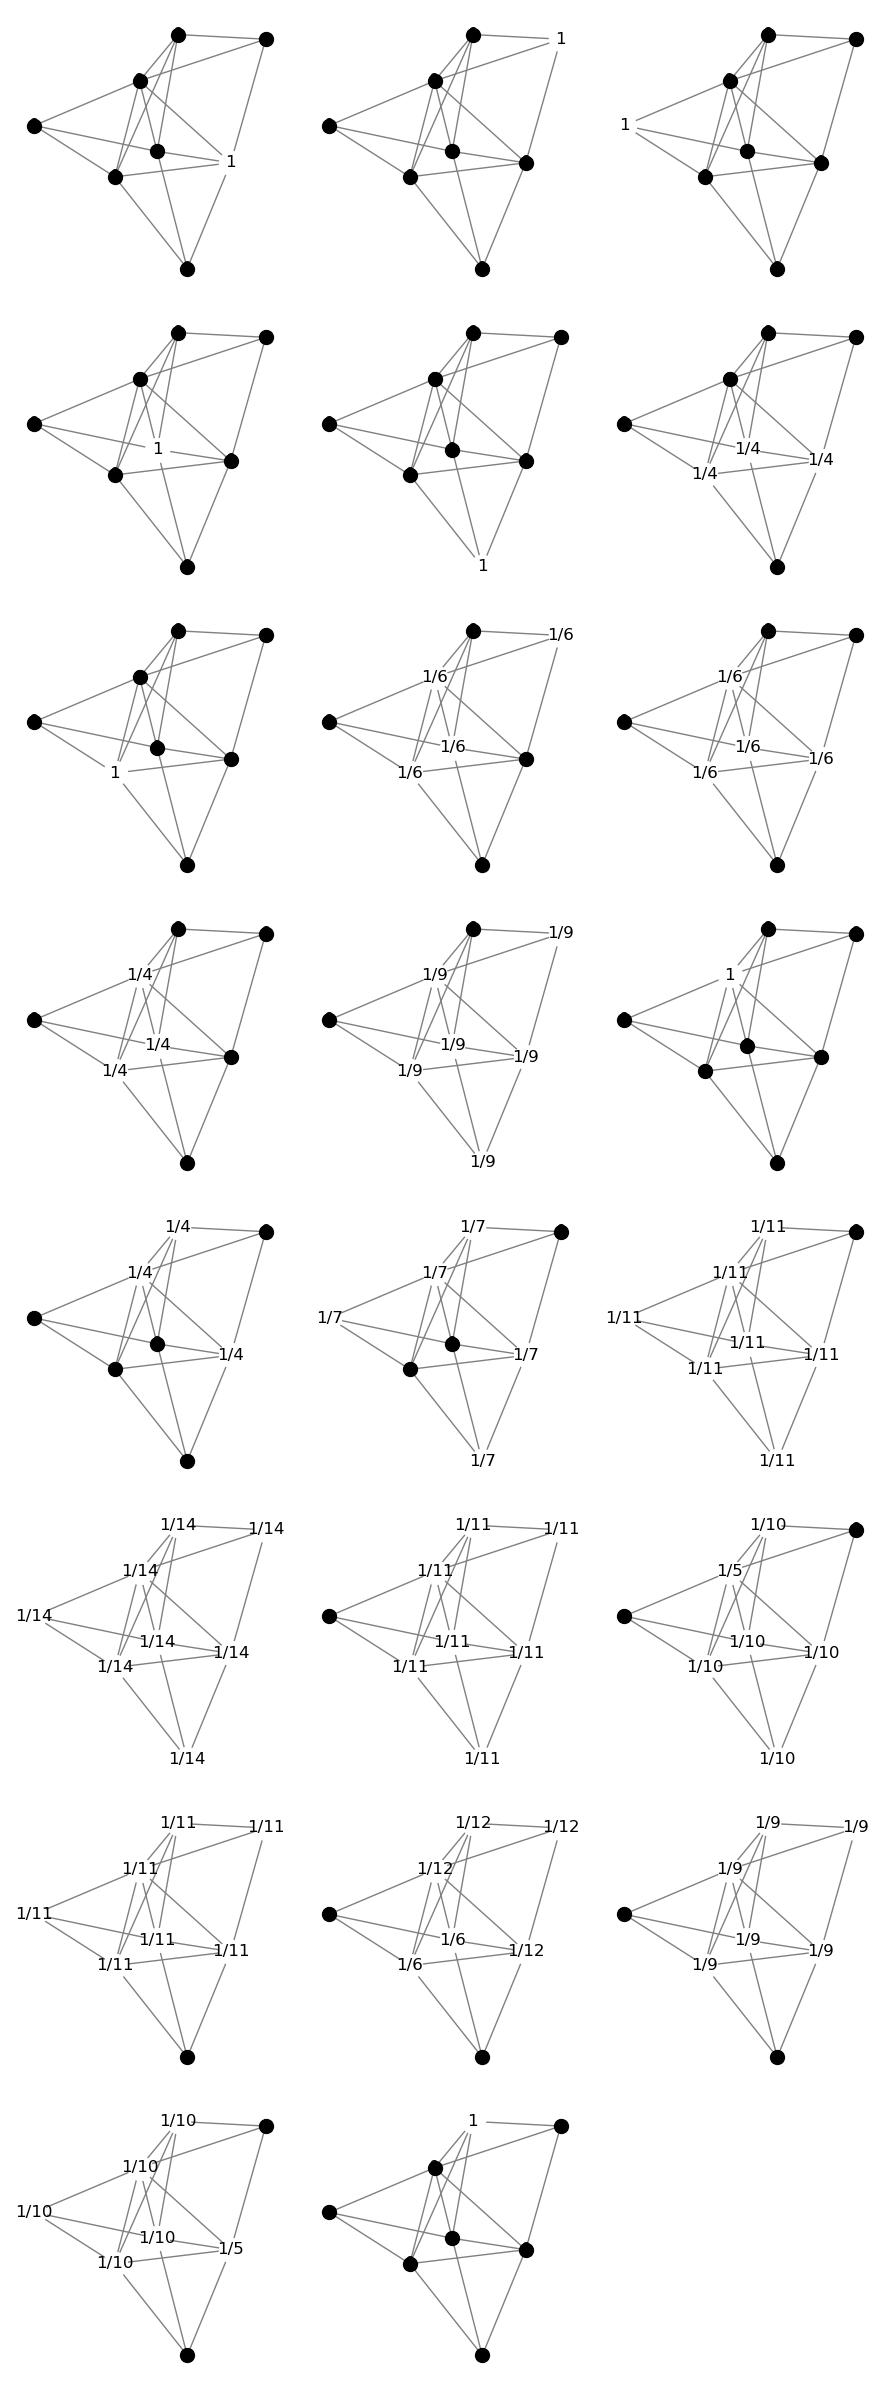

In [18]:
import random as rnd
seed= 123
G = nx.gnp_random_graph(8,0.4,seed)
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

34
min =  4/7
etamax = 1/min =  7/4
Row with minimum sum: [Fraction(1, 14) Fraction(1, 14) Fraction(1, 14) Fraction(1, 14)
 Fraction(1, 14) Fraction(1, 14) Fraction(1, 14) Fraction(1, 14)]


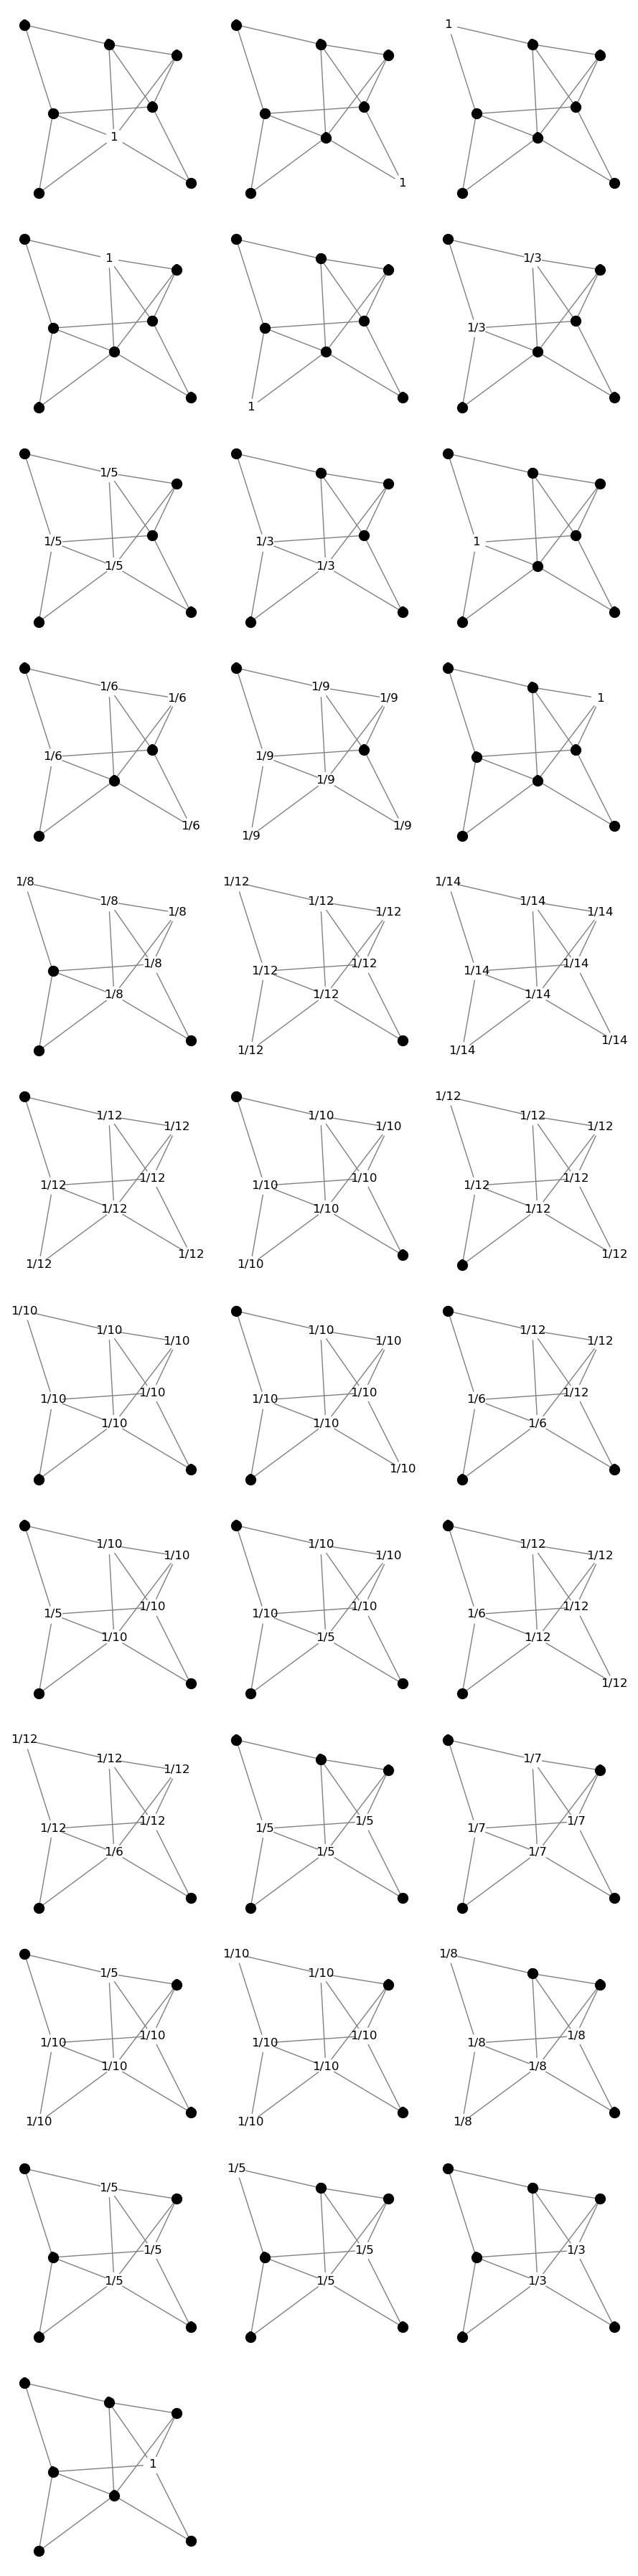

In [19]:
seed= 123
G = nx.gnp_random_graph(8,0.3,seed)
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

21
min =  7/12
etamax = 1/min =  12/7
Row with minimum sum: [Fraction(1, 12) Fraction(1, 12) Fraction(1, 12) Fraction(1, 12)
 Fraction(1, 12) Fraction(1, 12) Fraction(1, 12)]


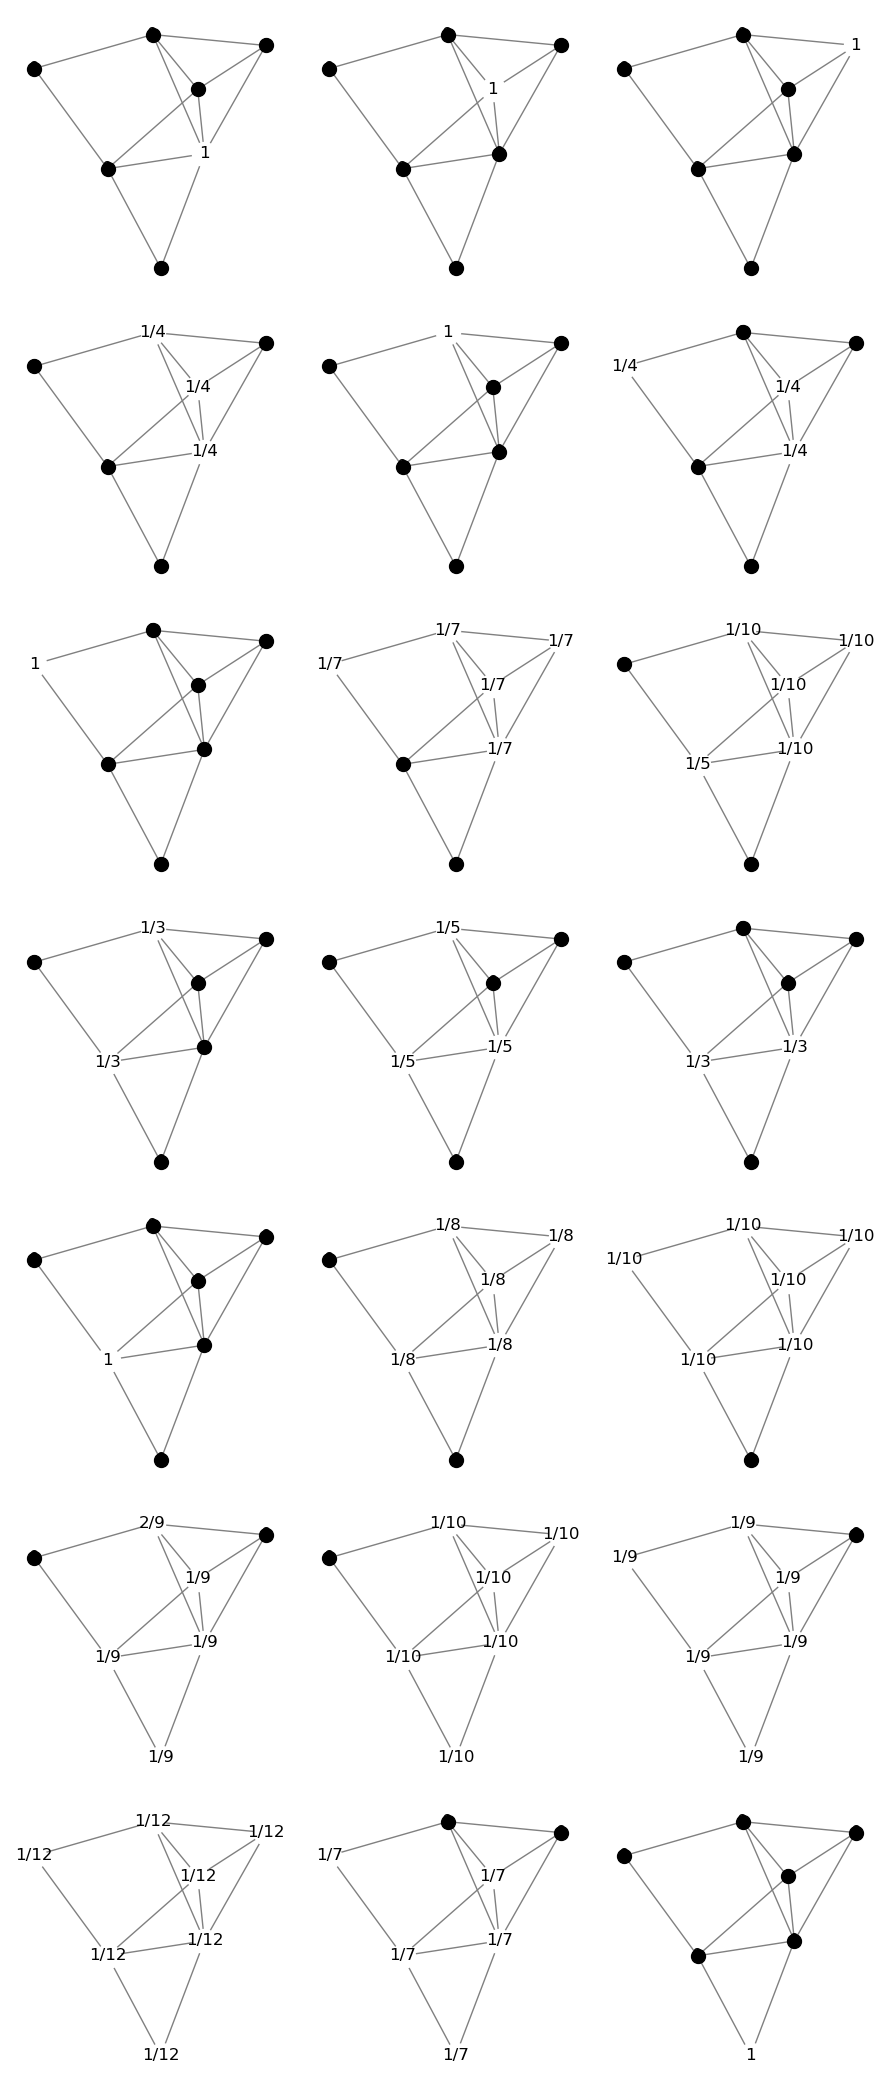

In [11]:
G = nx.Graph()
nx.add_path(G,[0,1,2,3,4,5,6,0])
nx.add_path(G,[6,1])
nx.add_path(G,[6,3])
nx.add_path(G,[6,4])
nx.add_path(G,[5,1])
nx.add_path(G,[5,3])
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

16
min =  1/2
etamax = 1/min =  2
Row with minimum sum: [0 0 Fraction(1, 2) 0 0 0 0]


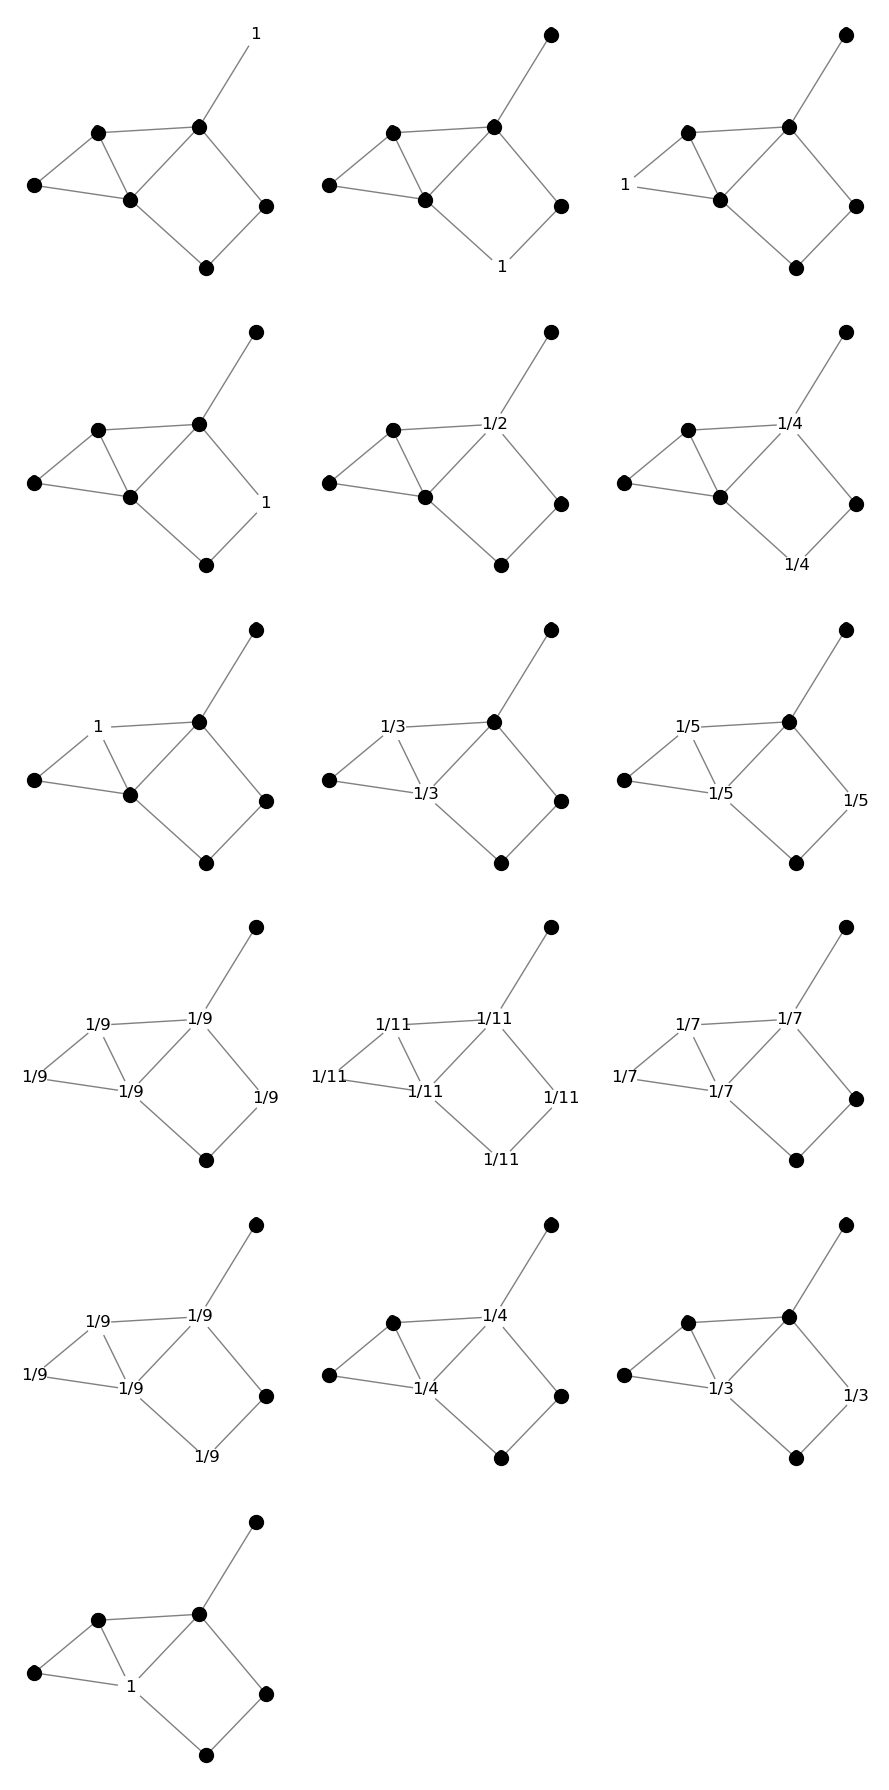

In [13]:
#Nov 7, ex7
G = nx.Graph()
nx.add_path(G,[0,1,2,0])
nx.add_path(G,[2,3])
nx.add_path(G,[2,4])
nx.add_path(G,[0,5])
nx.add_path(G,[0,6])
nx.add_path(G,[1,5])
nx.add_path(G,[4,6])
pos = nx.spring_layout(G)
A,min_row, etamax =  draw(G)

In [15]:
print(len(list(alg.spanning_trees(G))))

29
